In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
path = Path('../data/interim')

In [34]:
df = pd.read_csv(path / 'properties_cleaned_v2.csv')

In [35]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,2160.0,Plot area 240(200.67 sq.m.),3,3,3,...,NaN,2160.0,NaN,0,0,1,1,0,0,86
1,house,omkar bunglows,thaltej,4.75,15079.0,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 315 ...,4,4,1,...,NaN,315.0,NaN,0,0,1,1,0,1,161
2,flat,sheeva amardeep enclave,nava naroda,0.27,21600.0,125.0,Built Up area: 125 (11.61 sq.m.)Carpet area: 1...,2,2,1,...,NaN,125.0,115.0,0,0,0,0,0,0,0
3,flat,arizona river heights,usmanpura,2.10,8909.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3,3,2,...,2357.0,NaN,1415.0,0,0,0,1,1,1,54
4,flat,avirat silver harmony,gota,0.98,4839.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,1,...,2025.0,NaN,NaN,0,0,1,0,0,0,75


In [36]:
df.shape

(5933, 23)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5933 entries, 0 to 5932
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        5933 non-null   object 
 1   society              5933 non-null   object 
 2   sector               5933 non-null   object 
 3   price                5922 non-null   float64
 4   price_per_sqft       5921 non-null   float64
 5   area                 5921 non-null   float64
 6   areaWithType         5933 non-null   object 
 7   bedRoom              5933 non-null   int64  
 8   bathroom             5933 non-null   int64  
 9   balcony              5933 non-null   object 
 10  floorNum             5896 non-null   float64
 11  facing               4255 non-null   object 
 12  agePossession        5933 non-null   object 
 13  super_built_up_area  2519 non-null   float64
 14  built_up_area        2524 non-null   float64
 15  carpet_area          3413 non-null   f

In [38]:
df.duplicated().sum()

5

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,2160.0,Plot area 240(200.67 sq.m.),3,3,3,...,NaN,2160.0,NaN,0,0,1,1,0,0,86
1,house,omkar bunglows,thaltej,4.75,15079.0,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 315 ...,4,4,1,...,NaN,315.0,NaN,0,0,1,1,0,1,161
2,flat,sheeva amardeep enclave,nava naroda,0.27,21600.0,125.0,Built Up area: 125 (11.61 sq.m.)Carpet area: 1...,2,2,1,...,NaN,125.0,115.0,0,0,0,0,0,0,0
3,flat,arizona river heights,usmanpura,2.10,8909.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3,3,2,...,2357.0,NaN,1415.0,0,0,0,1,1,1,54
4,flat,avirat silver harmony,gota,0.98,4839.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,1,...,2025.0,NaN,NaN,0,0,1,0,0,0,75


### property_type

<Axes: >

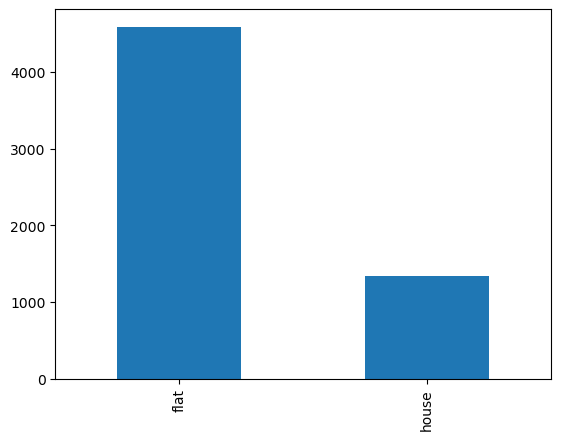

In [41]:
df['property_type'].value_counts().plot(kind='bar',)

#### Observations

- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

### society

In [42]:
df['society'].value_counts().shape

(2597,)

In [43]:
df['society'].value_counts()

independent                     515
on request                      212
shaligram prime                  54
godrej garden city               49
olive greens                     47
                               ... 
rudra mahadev heights             1
swarnim stone and villa           1
3rd eye residency one motera      1
a/2/10 soham park vastrapur       1
arjun skylife                     1
Name: society, Length: 2597, dtype: int64

In [44]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

on request                        0.039165
shaligram prime                   0.049141
godrej garden city                0.058193
olive greens                      0.066876
goyal orchid legacy               0.073527
                                    ...   
the crest                         0.239608
nidhi infracon kuber residency    0.241086
mount alaya heights               0.242564
ygb shilp 14                      0.244042
applewoods villa santolina        0.245520
Name: society, Length: 75, dtype: float64

In [45]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 2,
 'High (50-100)': 1,
 'Average (10-49)': 63,
 'Low (2-9)': 758,
 'Very Low (1)': 1773}

<Axes: >

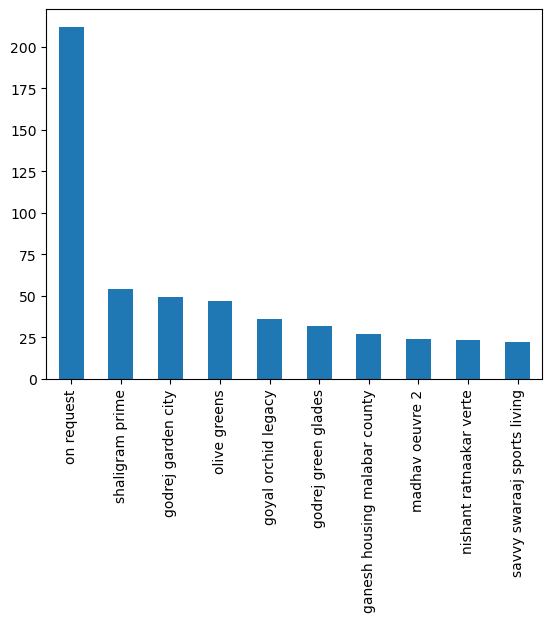

In [46]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [47]:
df['society'].isnull().sum()

0

In [48]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


### sector

In [49]:
# unique sectors
df['sector'].value_counts()

south bopal           585
gota                  541
chandkheda            335
science city          306
shela                 254
vastral               253
satellite             243
jagatpur              218
bodakdev              214
motera                203
maninagar             202
naroda                183
nikol                 173
thaltej               149
vatva                 136
narol                 134
paldi                 133
new ranip             131
ghuma                 130
vastrapur             115
nava naroda           102
memnagar               91
shilaj                 74
sola                   72
isanpur                67
ghatlodia              59
jodhpur                59
vaishnodevi circle     59
charodi                58
gurukul                58
bapunagar              57
prahlad nagar          47
odhav                  44
bhadaj                 44
koteshwar              43
shahibaug              41
naranpura              32
sg highway             32
chandlodia  

<Axes: >

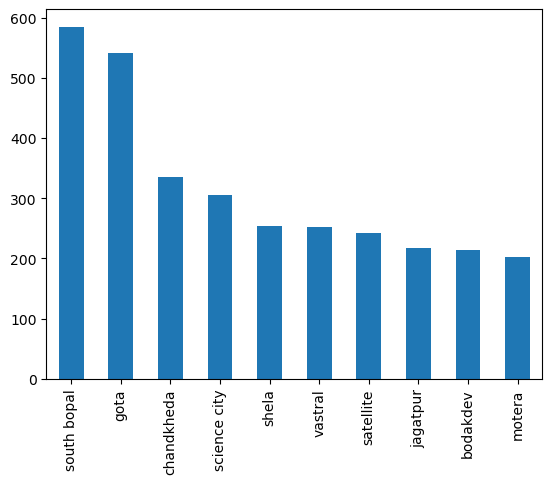

In [50]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [51]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 21,
 'High (50-100)': 10,
 'Average (10-49)': 17,
 'Low (2-9)': 0,
 'Very Low (1)': 0}

### Price

In [52]:
df['price'].isnull().sum()

11

In [53]:
df['price'].describe()

count    5917.000000
mean        1.445815
std         1.894094
min         0.040000
25%         0.480000
50%         0.730000
75%         1.600000
max        22.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

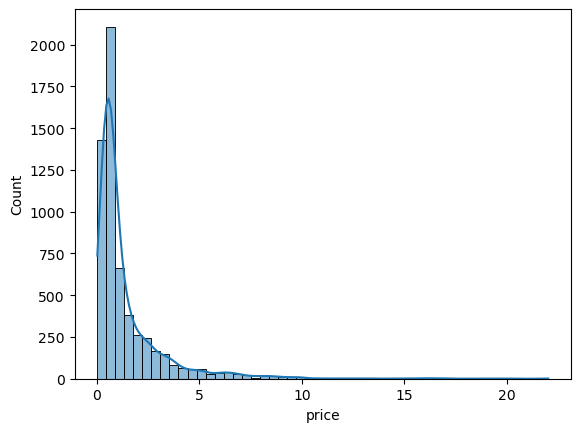

In [54]:
sns.histplot(df['price'], kde=True, bins=50)

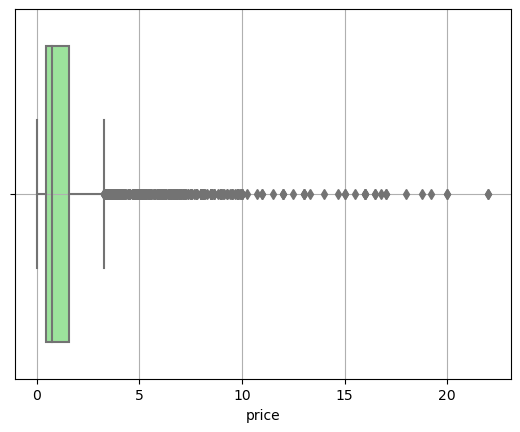

In [55]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [56]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.918286237849582 23.1347504360652


In [57]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01    0.14
0.05    0.23
0.95    5.00
0.99    9.00
Name: price, dtype: float64

In [58]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.12

In [59]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.2000000000000002 3.2800000000000002


In [60]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(624, 23)

In [61]:
outliers['price'].describe()

count    624.000000
mean       5.803942
std        2.925587
min        3.300000
25%        3.790000
50%        5.000000
75%        6.630000
max       22.000000
Name: price, dtype: float64

<Axes: >

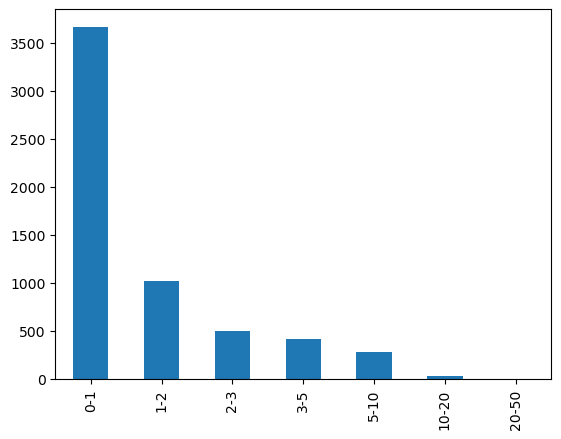

In [62]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

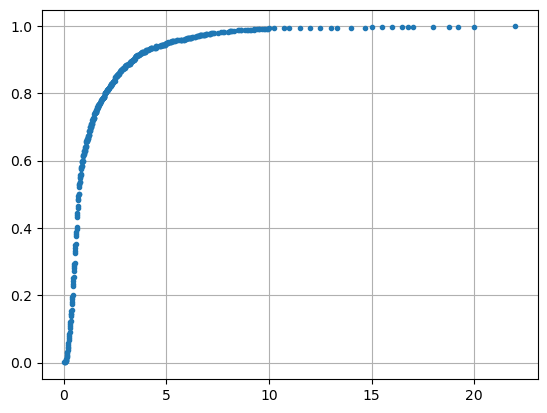

In [63]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

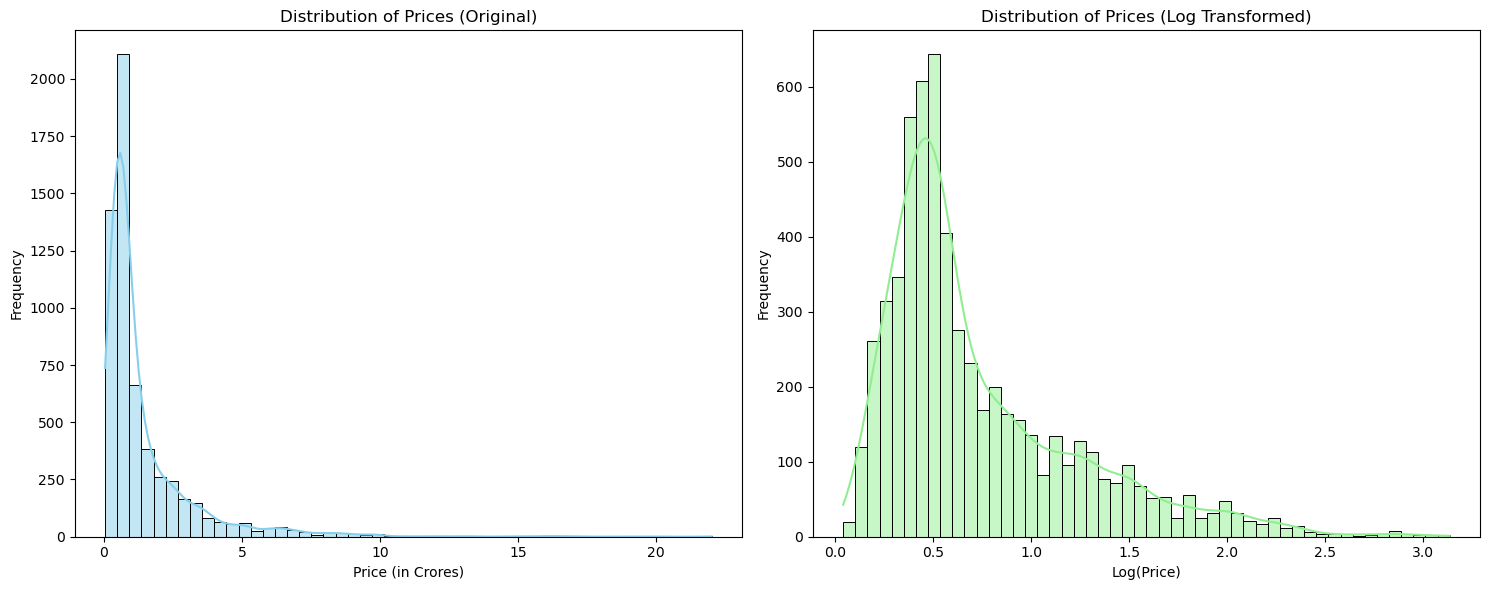

In [64]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [65]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.4365255685163283 1.9086695439150398


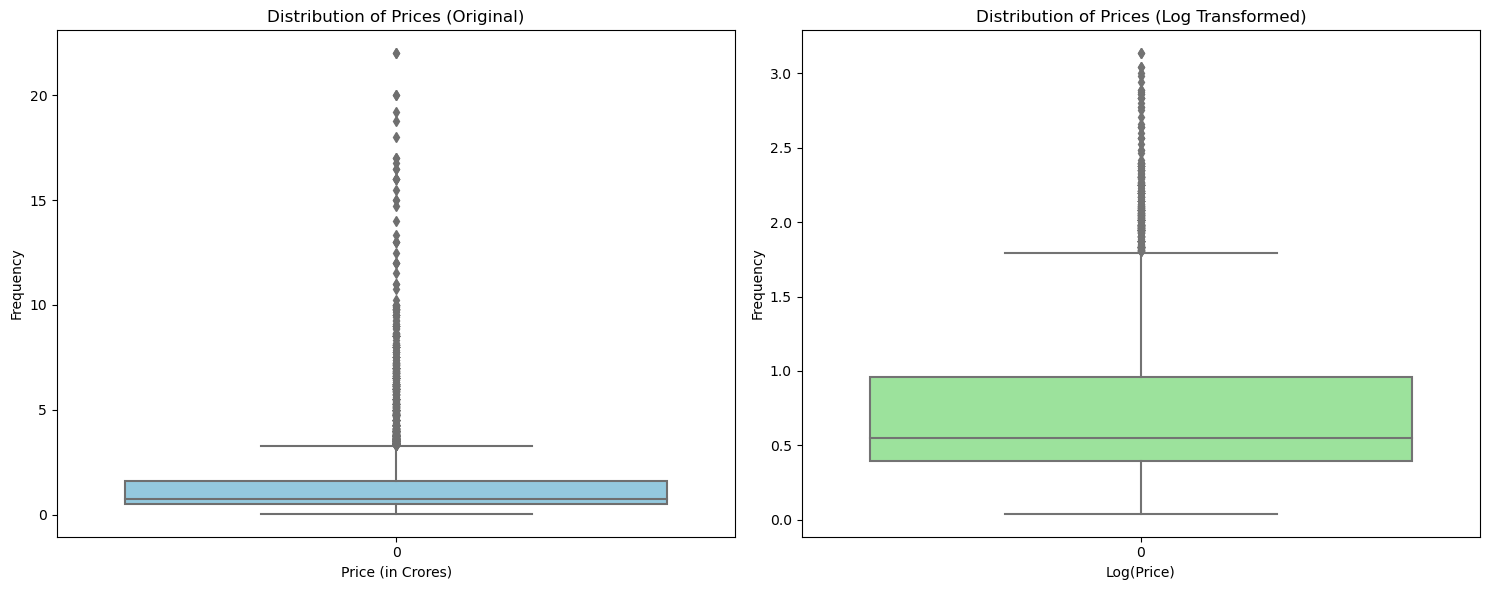

In [66]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [67]:
df['price_per_sqft'].isnull().sum()

12

In [68]:
df['price_per_sqft'].describe()

count    5.916000e+03
mean     1.418568e+04
std      1.512836e+05
min      1.000000e+00
25%      4.308500e+03
50%      5.874500e+03
75%      9.164000e+03
max      8.100000e+06
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

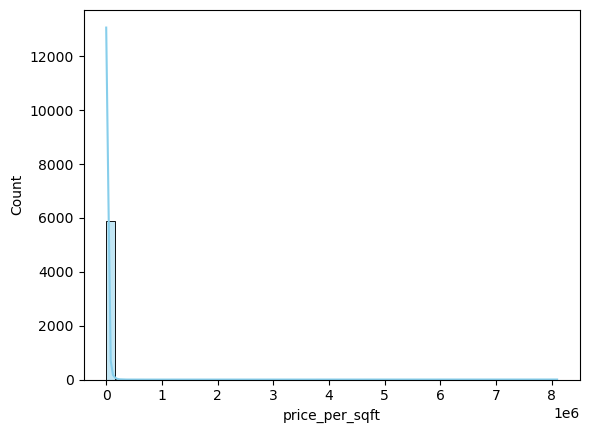

In [69]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: >

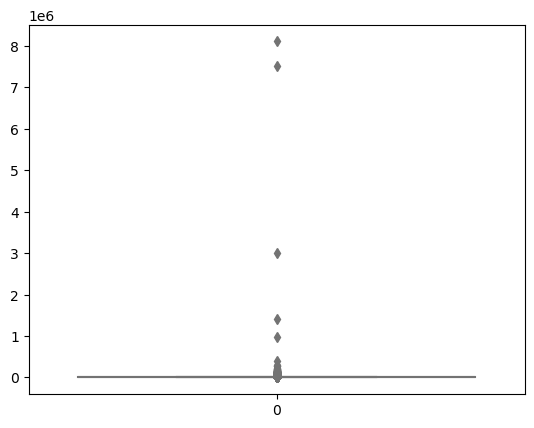

In [70]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

### bedRoom

In [71]:
df['bedRoom'].isnull().sum()

0

<Axes: >

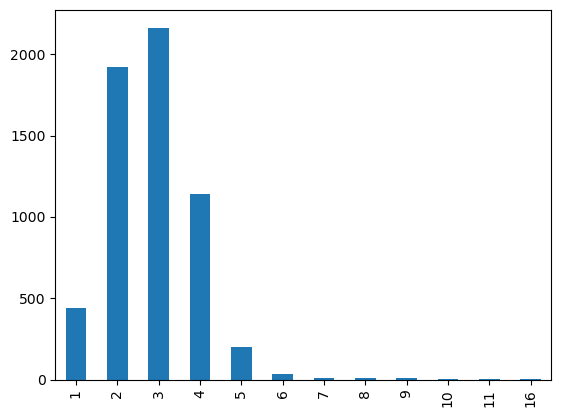

In [72]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

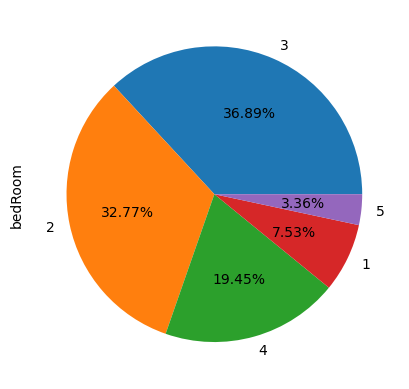

In [73]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [74]:
df['bathroom'].isnull().sum()

0

<Axes: >

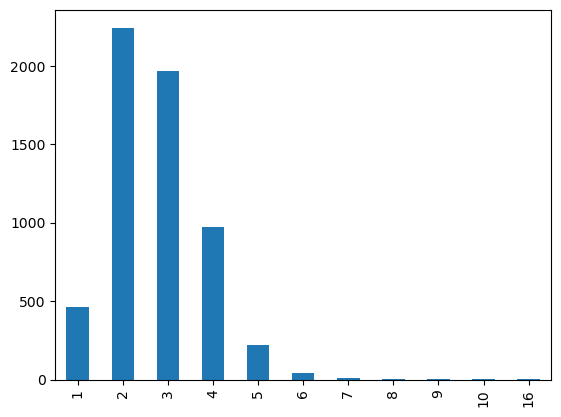

In [75]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

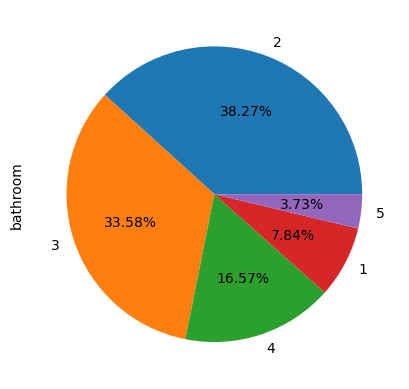

In [76]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [77]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,2160.0,Plot area 240(200.67 sq.m.),3,3,3,...,NaN,2160.0,NaN,0,0,1,1,0,0,86
1,house,omkar bunglows,thaltej,4.75,15079.0,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 315 ...,4,4,1,...,NaN,315.0,NaN,0,0,1,1,0,1,161
2,flat,sheeva amardeep enclave,nava naroda,0.27,21600.0,125.0,Built Up area: 125 (11.61 sq.m.)Carpet area: 1...,2,2,1,...,NaN,125.0,115.0,0,0,0,0,0,0,0
3,flat,arizona river heights,usmanpura,2.10,8909.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3,3,2,...,2357.0,NaN,1415.0,0,0,0,1,1,1,54
4,flat,avirat silver harmony,gota,0.98,4839.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,1,...,2025.0,NaN,NaN,0,0,1,0,0,0,75


### balcony

In [78]:
df['balcony'].isnull().sum()

0

<Axes: >

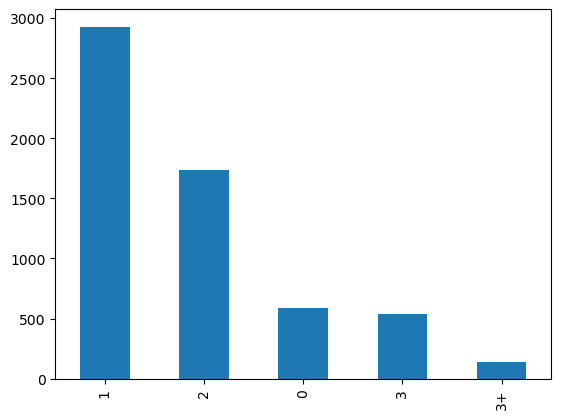

In [79]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

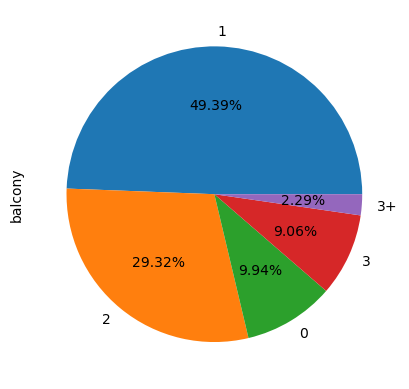

In [80]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [81]:
### floorNum

In [82]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,3.0,North,Relatively New,NaN,2160.0,NaN,0,0,1,1,0,0,86
1,2.0,East,Old Property,NaN,315.0,NaN,0,0,1,1,0,1,161
2,3.0,NaN,Undefined,NaN,125.0,115.0,0,0,0,0,0,0,0
3,11.0,East,Moderately Old,2357.0,NaN,1415.0,0,0,0,1,1,1,54
4,9.0,East,Moderately Old,2025.0,NaN,NaN,0,0,1,0,0,0,75


In [83]:
df['floorNum'].isnull().sum()

37

In [84]:
df['floorNum'].describe()

count    5891.000000
mean        4.547955
std         3.769172
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        33.000000
Name: floorNum, dtype: float64

<Axes: >

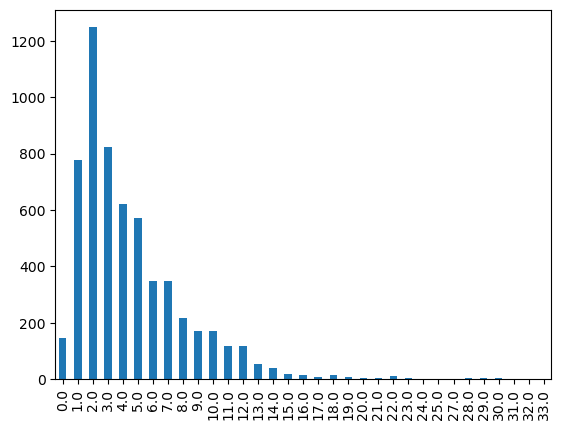

In [85]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

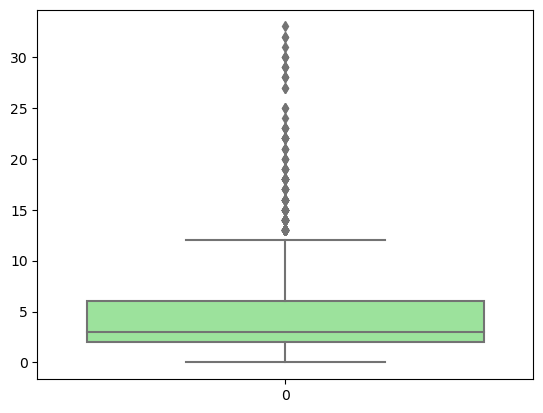

In [86]:
sns.boxplot(df['floorNum'], color='lightgreen')

### facing

In [87]:
df['facing'].isnull().sum()

1676

In [88]:
df['facing'].fillna('NA',inplace=True)

In [89]:
df['facing'].value_counts()

East          2084
NA            1676
North-East     604
West           595
North          363
North-West     212
South          140
South-East     137
South-West     117
Name: facing, dtype: int64

### agePossession

In [90]:
df['agePossession'].isnull().sum()

0

In [91]:
df['agePossession'].value_counts()

Relatively New        1813
Moderately Old        1279
Old Property          1076
Under Construction     674
Undefined              550
New Property           536
Name: agePossession, dtype: int64

### areas

In [92]:
# super built up area
df['super_built_up_area'].isnull().sum()

3410

In [93]:
df['super_built_up_area'].describe()

count    2.518000e+03
mean     2.211451e+03
std      3.318164e+04
min      3.000000e+01
25%      6.810000e+02
50%      1.341000e+03
75%      1.918000e+03
max      1.665210e+06
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

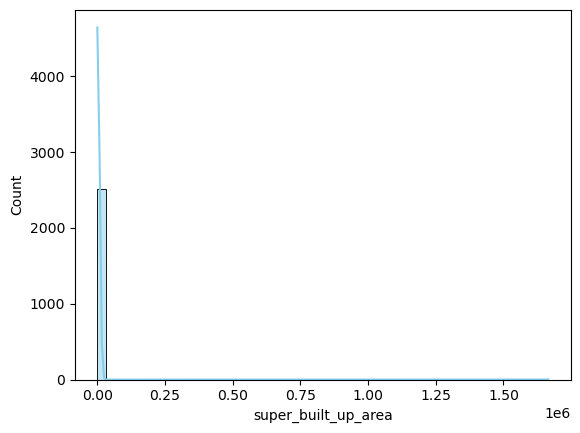

In [94]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

In [95]:
# sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

In [96]:
# built up area
df['built_up_area'].isnull().sum()

3404

In [97]:
df['built_up_area'].describe()

count    2.524000e+03
mean     4.143003e+03
std      1.393156e+05
min      1.000000e+00
25%      3.140000e+02
50%      1.024500e+03
75%      1.797000e+03
max      7.000000e+06
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

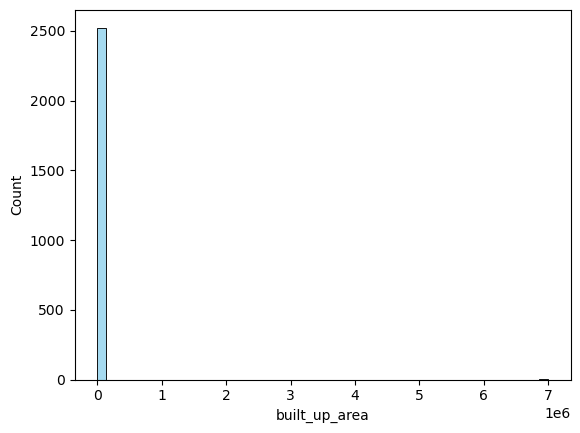

In [98]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: >

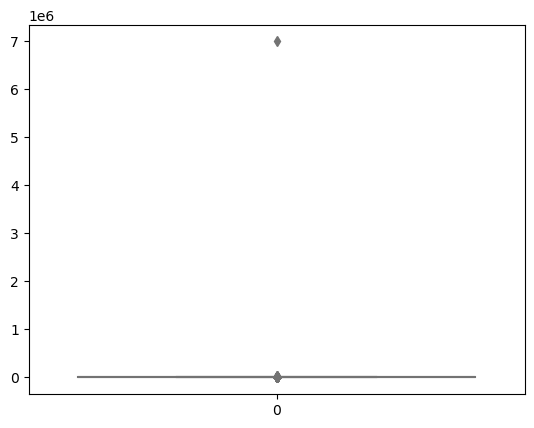

In [99]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

In [100]:
# carpet area
df['carpet_area'].isnull().sum()

2519

In [101]:
df['carpet_area'].describe()

count    3.409000e+03
mean     1.658441e+03
std      3.447120e+04
min      1.000000e+00
25%      1.870000e+02
50%      8.190000e+02
75%      1.250000e+03
max      2.000000e+06
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

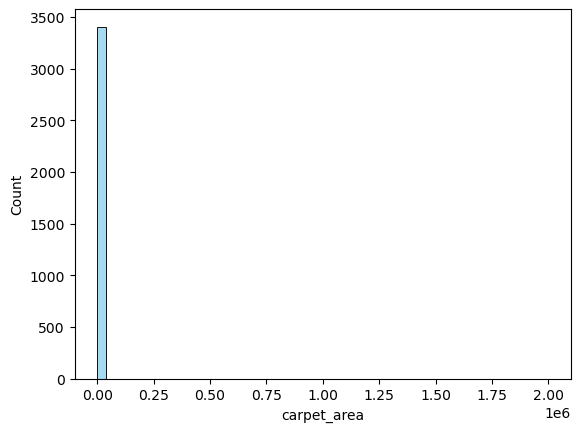

In [102]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

In [103]:
# sns.boxplot(df['carpet_area'].dropna(), color='skyblue')

In [104]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,1,1,0,0,86
1,0,0,1,1,0,1,161
2,0,0,0,0,0,0,0
3,0,0,0,1,1,1,54
4,0,0,1,0,0,0,75
...,...,...,...,...,...,...,...
5928,0,0,0,0,0,0,119
5929,0,0,0,0,0,0,61
5930,0,0,0,0,0,0,0
5931,0,0,1,1,0,0,189


### additional rooms

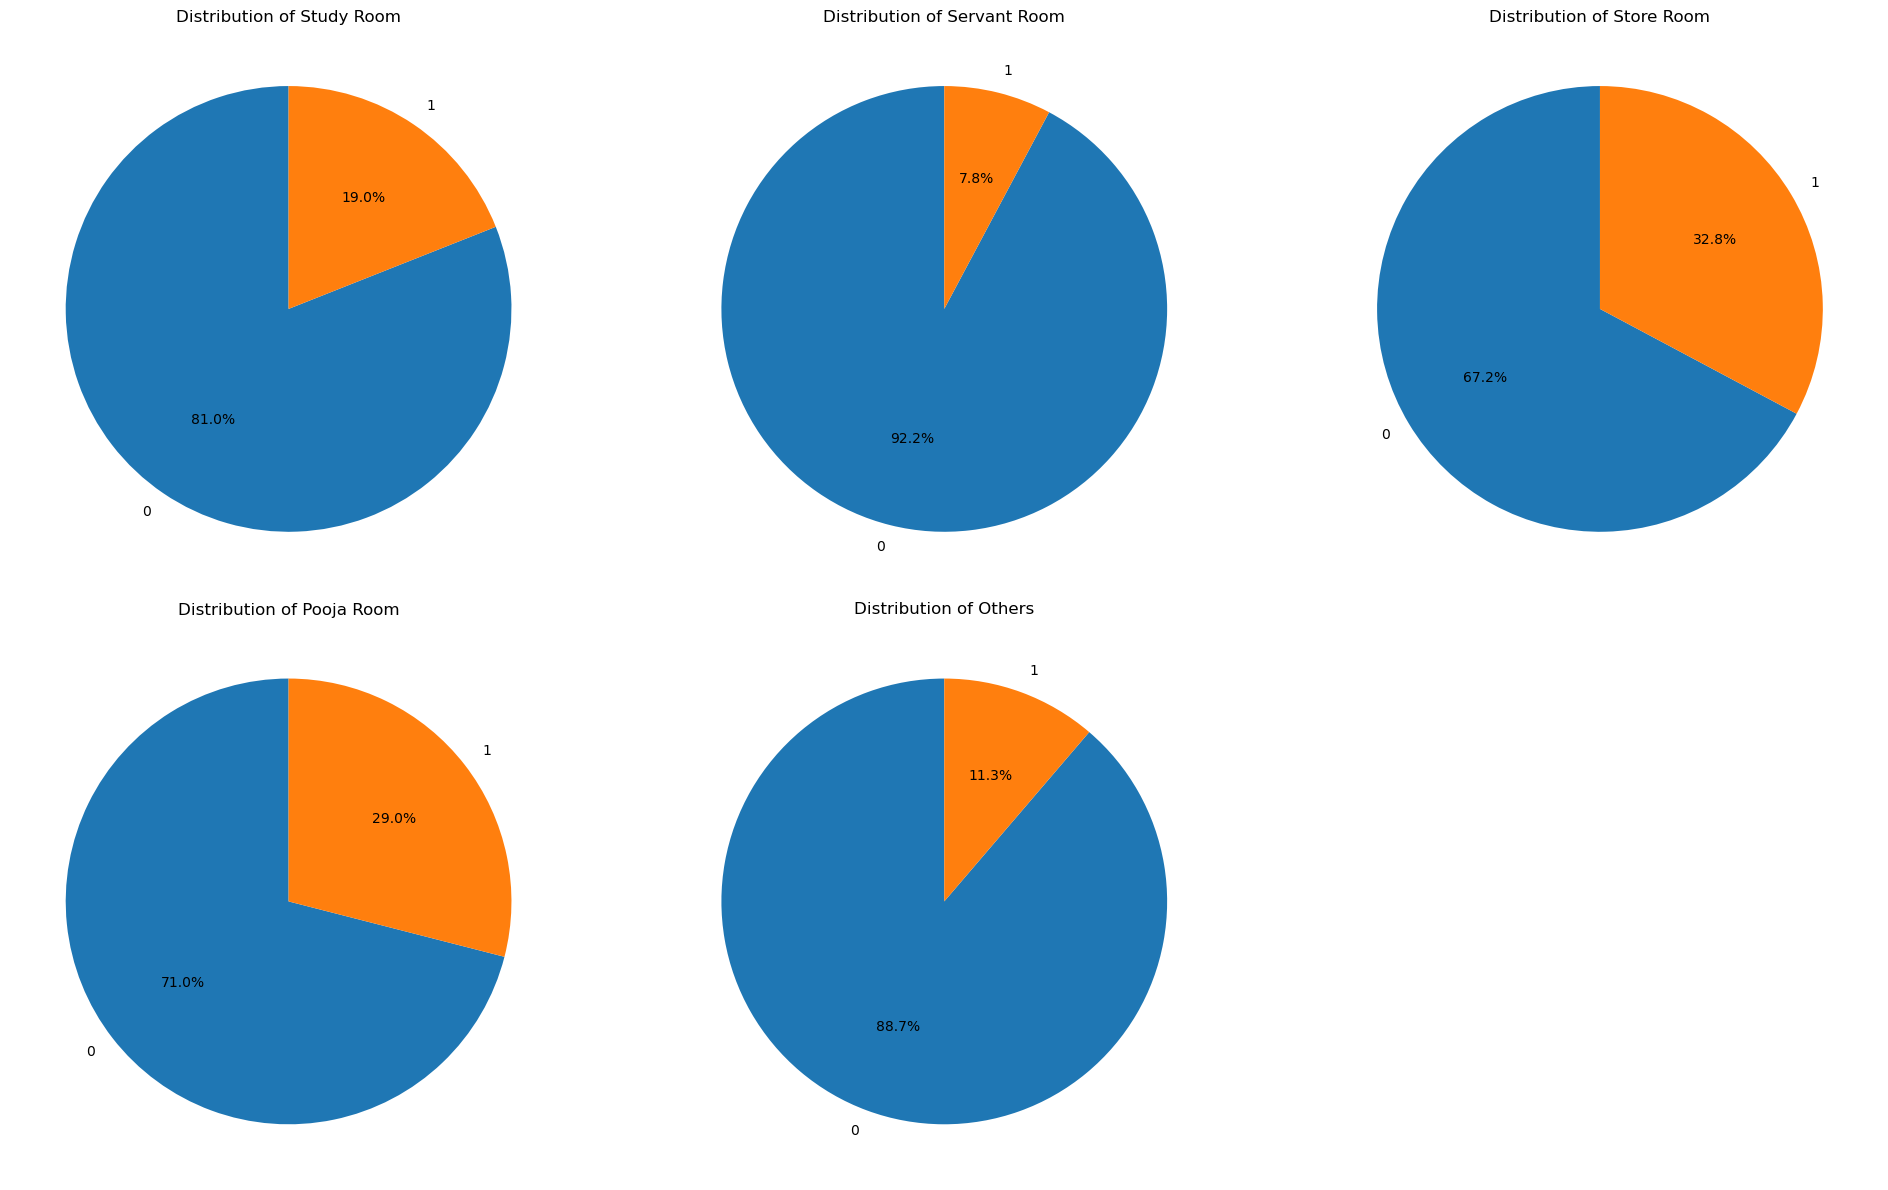

In [105]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [106]:
df['furnishing_type'].value_counts()

0    4245
2     973
1     710
Name: furnishing_type, dtype: int64

<Axes: ylabel='furnishing_type'>

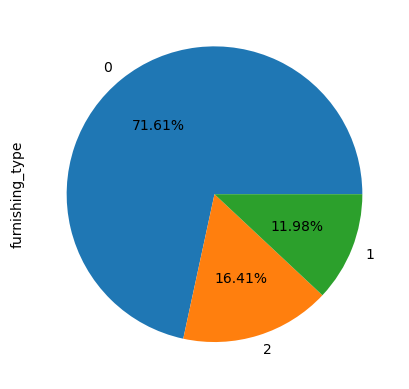

In [107]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [108]:
df['luxury_score'].isnull().sum()

0

In [109]:
df['luxury_score'].describe()

count    5928.000000
mean       73.077260
std        65.821064
min         0.000000
25%        17.000000
50%        59.000000
75%       113.000000
max       262.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

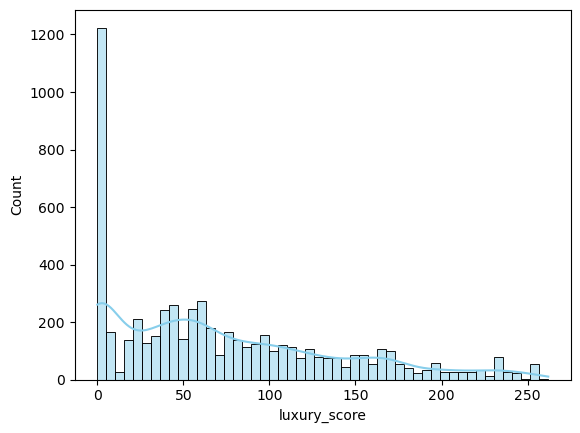

In [110]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

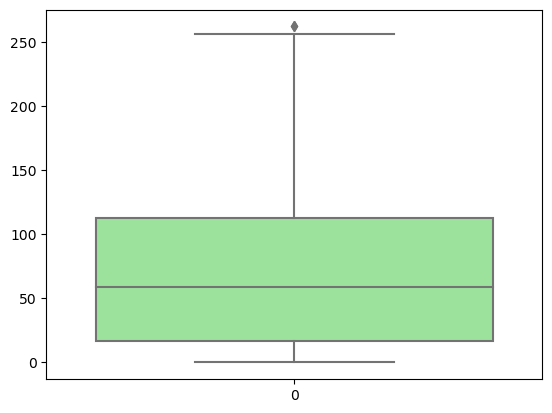

In [111]:
sns.boxplot(df['luxury_score'], color='lightgreen')

In [112]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,2160.0,Plot area 240(200.67 sq.m.),3,3,3,...,NaN,2160.0,NaN,0,0,1,1,0,0,86
1,house,omkar bunglows,thaltej,4.75,15079.0,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 315 ...,4,4,1,...,NaN,315.0,NaN,0,0,1,1,0,1,161
2,flat,sheeva amardeep enclave,nava naroda,0.27,21600.0,125.0,Built Up area: 125 (11.61 sq.m.)Carpet area: 1...,2,2,1,...,NaN,125.0,115.0,0,0,0,0,0,0,0
3,flat,arizona river heights,usmanpura,2.10,8909.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3,3,2,...,2357.0,NaN,1415.0,0,0,0,1,1,1,54
4,flat,avirat silver harmony,gota,0.98,4839.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,1,...,2025.0,NaN,NaN,0,0,1,0,0,0,75
